## MatPlotLib Assignment - The Power of Plots

### Observations Regarding the Data Below:

#### (1) Capomulin and Ramicane showed the best results at lowering overall tumor volume and had the most points of data to source.

#### (2) There appears to be a positive relationship between the weight of the mouse and the average tumor volume.

#### (3) The study was nearly divided evenly between male and female mice.

## Dependencies and Starter Code

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
mouse_clinical_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = pd.DataFrame({"Mean": mouse_clinical_df["Tumor Volume (mm3)"].groupby(mouse_clinical_df["Drug Regimen"]).mean(),
                                      "Median": mouse_clinical_df["Tumor Volume (mm3)"].groupby(mouse_clinical_df["Drug Regimen"]).median(),
                                      "Variance": mouse_clinical_df["Tumor Volume (mm3)"].groupby(mouse_clinical_df["Drug Regimen"]).var(),
                                      "STD": mouse_clinical_df["Tumor Volume (mm3)"].groupby(mouse_clinical_df["Drug Regimen"]).std(),
                                      "SEM": mouse_clinical_df["Tumor Volume (mm3)"].groupby(mouse_clinical_df["Drug Regimen"]).sem()})
summary_statistics_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

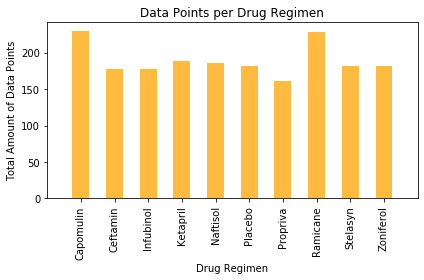

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
num_reg = pd.DataFrame(mouse_clinical_df.groupby("Drug Regimen")["Mouse ID"].count())
num_reg = num_reg.reset_index()
num_reg = num_reg.rename(columns= {"Mouse ID":"Data Points"})

num_pan_bar = num_reg.plot.bar(y="Data Points", color="orange", alpha=0.75, legend=False)
num_pan_bar.set_xticklabels(num_reg["Drug Regimen"], rotation=90)
plt.xlim(-1, 10)
plt.ylabel("Total Amount of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Data Points per Drug Regimen")
plt.tight_layout()
plt.show()

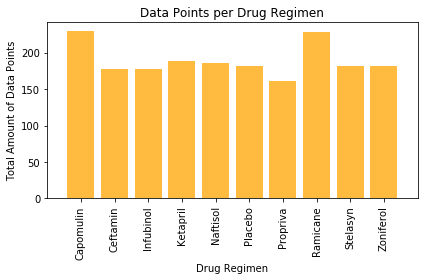

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(num_reg["Drug Regimen"]))
y_axis = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

plt.bar(x_axis, y_axis, color="orange", alpha=0.75)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)
plt.xlim(-1, 10)
plt.ylabel("Total Amount of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Data Points per Drug Regimen")
plt.tight_layout()
plt.show()

## Pie plots

In [5]:
# Calculate Gender Count
gender_count = mouse_clinical_df.drop_duplicates(subset="Mouse ID", keep="first")
gender_count = pd.DataFrame(gender_count["Sex"].value_counts())
gender_count

,Sex
Male,125
Female,124


/Users/s.w.d./opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


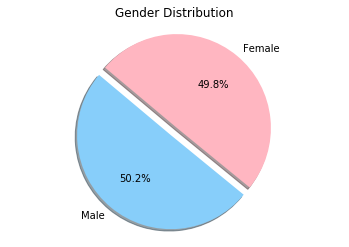

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightskyblue", "lightpink"]
explode = (0.1, 0)

g_plot = gender_count.plot.pie(y="Sex", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, legend=False)
plt.axes().set_ylabel("")
plt.title("Gender Distribution", color="black")
plt.axis("equal")
plt.show()

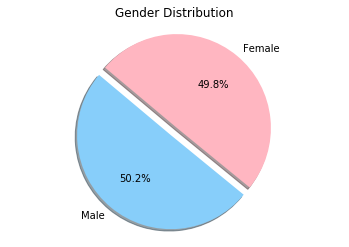

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = [125, 124]
labels = "Male", "Female"
colors = ["lightskyblue", "lightpink"]
explode = (0.1, 0)

plt.pie(values, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Distribution", color="black")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
t_volume = mouse_clinical_df.drop_duplicates(subset="Mouse ID", keep="last")
t_volume = t_volume[(t_volume["Drug Regimen"].str.contains("Capomulin|Ramicane|Infubinol|Ceftamin"))]

t_volume_sort = t_volume.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"], ascending=True)

final_t_volume = t_volume_sort[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_t_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
19,s185,Capomulin,23.343598
39,m601,Capomulin,28.430964
29,x401,Capomulin,28.484033
64,f966,Capomulin,30.485985
104,u364,Capomulin,31.023923
...,...,...,...
430,a444,Ramicane,43.047543
449,w678,Ramicane,43.166373
447,r921,Ramicane,43.419381
453,y449,Ramicane,44.183451


In [9]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
cap = final_t_volume[(final_t_volume["Drug Regimen"].str.contains("Capomulin"))]
ram = final_t_volume[(final_t_volume["Drug Regimen"].str.contains("Ramicane"))]
inf = final_t_volume[(final_t_volume["Drug Regimen"].str.contains("Infubinol"))]
cef = final_t_volume[(final_t_volume["Drug Regimen"].str.contains("Ceftamin"))]

In [10]:
# IQR for Capomulin
iqr_cap = st.iqr(cap["Tumor Volume (mm3)"], axis=None, rng=(25,75))
print(f"The IQR for Capomulin is {iqr_cap}")

The IQR for Capomulin is 7.781863460000004


In [11]:
# Outliers for Capomulin
cap_data = cap[["Tumor Volume (mm3)"]]

Q1,Q3 = np.percentile(cap[["Tumor Volume (mm3)"]], [25,75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

def outlier_treatment(cap_data):
    sorted(cap_data)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(cap["Tumor Volume (mm3)"])
cap[(cap["Tumor Volume (mm3)"] < lower_range) | (cap["Tumor Volume (mm3)"] > upper_range)]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)


#### No Outliers for Capomulin Exist

In [12]:
# IQR for Ramicane
iqr_ram = st.iqr(ram["Tumor Volume (mm3)"], axis=None, rng=(25,75))
print(f"The IQR for Ramicane is {iqr_ram}")

The IQR for Ramicane is 9.098536719999998


In [13]:
# Outliers for Ramicane
ram_data = ram[["Tumor Volume (mm3)"]]

Q1,Q3 = np.percentile(ram[["Tumor Volume (mm3)"]], [25,75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

def outlier_treatment(ram_data):
    sorted(ram_data)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(ram["Tumor Volume (mm3)"])
ram[(ram["Tumor Volume (mm3)"] < lower_range) | (ram["Tumor Volume (mm3)"] > upper_range)]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)


#### No Outliers for Ramicane Exist

In [14]:
# IQR for Infubinol
iqr_inf = st.iqr(inf["Tumor Volume (mm3)"], axis=None, rng=(25,75))
print(f"The IQR for Infubinol is {iqr_inf}")

The IQR for Infubinol is 11.477135160000003


In [15]:
# Outliers for Infubinol
inf_data = inf[["Tumor Volume (mm3)"]]

Q1,Q3 = np.percentile(inf[["Tumor Volume (mm3)"]], [25,75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

def outlier_treatment(inf_data):
    sorted(inf_data)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(inf["Tumor Volume (mm3)"])
inf[(inf["Tumor Volume (mm3)"] < lower_range) | (inf["Tumor Volume (mm3)"] > upper_range)]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
669,c326,Infubinol,36.321346


#### One Outlier for Infubinol Exists

In [16]:
# IQR for Ceftamin
iqr_cef = st.iqr(cef["Tumor Volume (mm3)"], axis=None, rng=(25,75), scale="raw", nan_policy="propagate", interpolation="linear", keepdims=False)
print(f"The IQR for Ceftamin is {iqr_cef}")

The IQR for Ceftamin is 15.577752179999997


In [17]:
# Outliers for Ceftamin
cef_data = cef[["Tumor Volume (mm3)"]]

Q1,Q3 = np.percentile(cef[["Tumor Volume (mm3)"]], [25,75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

def outlier_treatment(cef_data):
    sorted(cef_data)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(cef["Tumor Volume (mm3)"])
cef[(cef["Tumor Volume (mm3)"] < lower_range) | (cef["Tumor Volume (mm3)"] > upper_range)]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)


#### No Outliers for Ceftamin Exist

Text(0.5, 1.0, 'Tumor Volume (At End of Study)')

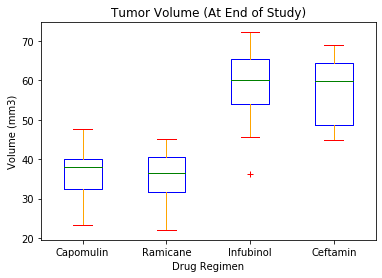

In [18]:
# Generate a box plot of the final tumor volumes of each mouse across four regimens of interest
cap_list = cap_data["Tumor Volume (mm3)"].tolist()
ram_list = ram_data["Tumor Volume (mm3)"].tolist()
inf_list = inf_data["Tumor Volume (mm3)"].tolist()
cef_list = cef_data["Tumor Volume (mm3)"].tolist()

Total_Volume = pd.DataFrame({"Capomulin": (cap_list),
                             "Ramicane": (ram_list),
                             "Infubinol": (inf_list),
                             "Ceftamin": (cef_list)})


box_color = {"boxes": "Blue", "whiskers": "Orange", "medians": "Green", "caps": "Red"}

boxplot = Total_Volume.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], grid=False, color=box_color, sym="r+")

boxplot.set_xlabel("Drug Regimen")
boxplot.set_ylabel("Volume (mm3)")
boxplot.set_title("Tumor Volume (At End of Study)")

## Line and scatter plots

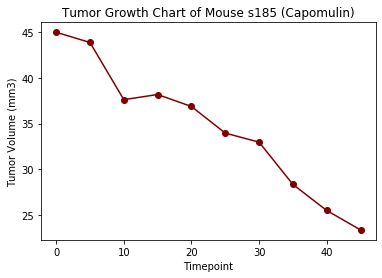

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = mouse_clinical_df[(mouse_clinical_df["Mouse ID"].str.contains("s185"))]
line_cap_mouse = cap_mouse[["Timepoint", "Tumor Volume (mm3)"]]
line_cap_mouse.set_index("Timepoint")["Tumor Volume (mm3)"].plot(marker="o", color="maroon")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Growth Chart of Mouse s185 (Capomulin)")
plt.show()

/Users/s.w.d./opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


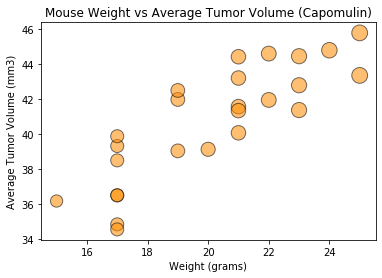

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_clinical_df[(mouse_clinical_df["Drug Regimen"].str.contains("Capomulin"))]
mouse_weight = mouse_weight.sort_values(by=["Mouse ID", "Timepoint"], ascending=True)
cap_mouse_weight = mouse_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_mouse_weight = cap_mouse_weight.set_index("Mouse ID")
cap_mouse_weight = cap_mouse_weight.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()
plt.scatter(cap_mouse_weight["Weight (g)"], cap_mouse_weight["Tumor Volume (mm3)"], marker="o", facecolors="DarkOrange", edgecolors="black", s=cap_mouse_weight["Weight (g)"]*10, alpha=0.55)
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume (Capomulin)")
plt.show()

The Correlation Coefficient is 0.8419363424694718


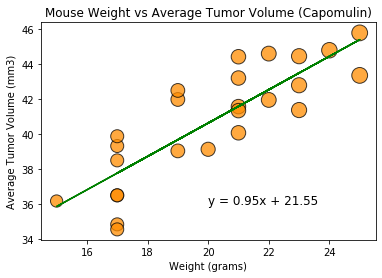

In [21]:
# Calculate the correlation coefficient and the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mouse_weight["Weight (g)"]
y_values = cap_mouse_weight["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o", facecolors="DarkOrange", edgecolors="black", s=x_values*10, alpha=0.75)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(20,36),fontsize=12,color="black")

plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume (Capomulin)")
print(f"The Correlation Coefficient is {rvalue}")
plt.show()